# Guía 1: Operaciones matemáticas básicas

## Aspectos teóricos

1. Deduzca la fórmula de 5 puntos para la derivación numérica.
2. Deduzca la generalización de la regla de Simpson.
3. Dada la integral $$\int_1^b x^{-2} g(x) dx$$ donde $g(x)$ es una función que tiende a un valor constante para grandes valores de $x$, realice un cambio de variables que la transforme en una expresión más adecuada para su evolución numérica, cuando $b$ toma valores muy grandes.
4. Escriba las ecuaciones utilizadas en el método de Newton-Raphson y el de la Secante.
5. Suponga que usted desea ajustar la función $f(x; a_1, a_2,..., a_k)$ con parámetros $a_1, a_2, ..., a_k$ a partir de un conjunto de puntos $\lbrace x_i, y_i \rbrace$ con $i=1, ..., N$. Escriba formalmente la función a minimizar en base al método de los cuadrados mínimos.

## Ejercicios de programación

1. Encontrar numéricamente las raíces de $f(x) = x^2 - 5$. Compare el número de iteraciones necesarias para lograr la convergencia con distintos valores de tolerancia. Compare para los distintos métodos de búsqueda: Bisección, Newton-Raphson y Secante.

In [1]:
func = lambda x: x**2 - 5
fprime = lambda x: 2 * x

a, b = 0.0, 5.0
tol = 1e-12

In [2]:
from scipy.optimize import bisect

bisect(func, a, b, xtol=tol, rtol=tol, full_output=True)

(2.2360679774988057,
       converged: True
            flag: 'converged'
  function_calls: 43
      iterations: 41
            root: 2.2360679774988057)

In [3]:
from scipy.optimize import newton

newton(func, b, fprime=fprime, tol=tol, full_output=True)

(2.23606797749979,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 2.23606797749979)

In [4]:
# secante = newton sin especificar `fprime`

newton(func, b, fprime=None, tol=tol, full_output=True)

(2.23606797749979,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 2.23606797749979)

2. Evaluar la derivada de la función $\sin(x)$ en el intervalo $[2\pi, 4\pi]$. Analice el resultado para diferentes valores del incremento finito $h$. Estudie cómo varía el error numérico total en función de $h$ y de la precisión utilizada. Analice el error local en cada zona del dominio.

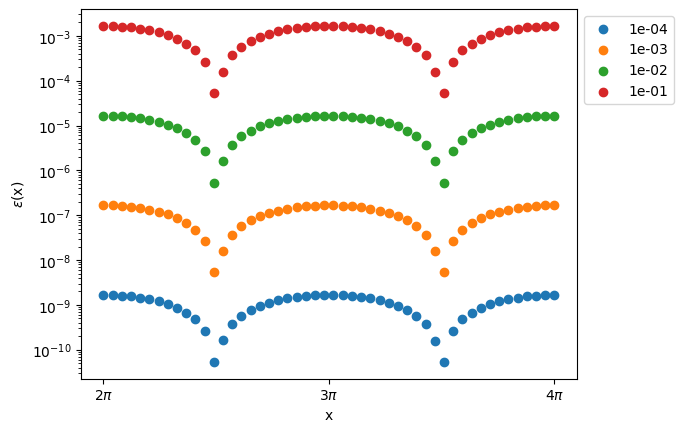

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

def tres_puntos(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)

x = np.linspace(2 * np.pi, 4 * np.pi)

fig, ax = plt.subplots()
for h in np.logspace(-4, -1, 4):
    ax.scatter(
        x,
        np.abs(np.cos(x) - tres_puntos(lambda x: np.sin(x), x, h)), 
        label=f"{h:.0e}",
    )

plt.yscale("log")
plt.xlabel("x")
plt.ylabel(r"$\varepsilon$(x)")
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

3. Escriba una función en Python para evaluar la integral definida de la función $\cos(x)$ en el intervalo $[0, 1]$. Estudie el efecto del número de particiones del intervalo sobre el error numérico.

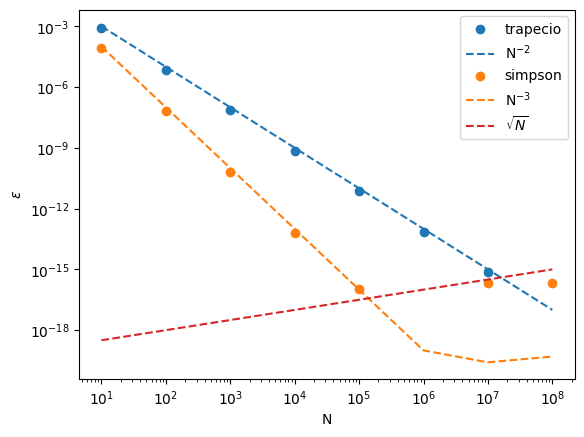

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapezoid, simpson

exacta = np.sin(1)

nums = np.logspace(1, 8, num=8, dtype=int)

errores_trapezoid, errores_simpson = [], []
for num in nums:
    x = np.linspace(0, 1, num=num)
    y = np.cos(x)
    
    errores_trapezoid.append(exacta - trapezoid(y, x))
    errores_simpson.append(exacta - simpson(y, x))
    
plt.scatter(nums, errores_trapezoid, color="tab:blue", label="trapecio")
plt.plot(nums, 0.1 / np.power(nums, 2), color="tab:blue", ls="--", label=r"N$^{-2}$")

plt.scatter(nums, np.abs(errores_simpson), color="tab:orange", label="simpson")
plt.plot(nums, 0.1 / np.power(nums, 3), color="tab:orange", ls="--", label=r"N$^{-3}$")

plt.plot(nums, 1e-19 * np.sqrt(nums), color="tab:red", ls="--", label=r"$\sqrt{N}$")

plt.xlabel("N")
plt.ylabel(r"$\varepsilon$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

4. Encontrar la distancia interatómica de equilibrio de la molécula NaCl a partir del siguiente potencial de interacción entre los iones
$$
V(r) = - \frac{e^2}{r} + \alpha e^{- \frac{r}{\rho}}
$$
donde $e^2 = 14.4 eV \cdot A$, $\alpha = 1.09 \cdot 10^3 eV$ y $\rho = 0.33 A$.

In [7]:
import numpy as np
from scipy.optimize import minimize

func = lambda r: 1.09e3 * np.exp(-r / 0.33) - 14.4 / r
res = minimize(func, 2.0, method="Nelder-Mead")
res

 final_simplex: (array([[2.36054688],
       [2.36044922]]), array([-5.24748912, -5.2474891 ]))
           fun: -5.247489118341834
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([2.36054688])

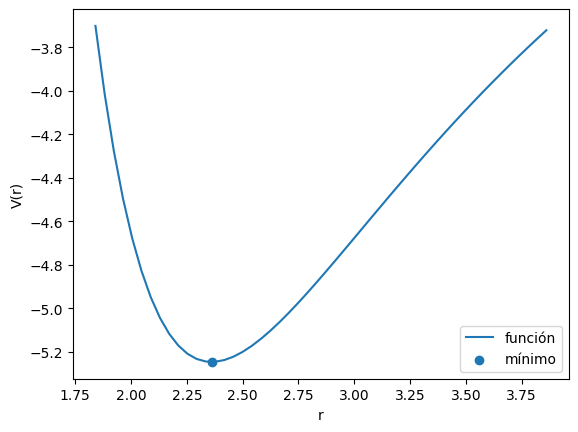

In [8]:
import matplotlib.pyplot as plt

r = np.linspace(res.x[0] - 0.52, res.x[0] + 1.5)

plt.plot(r, func(r), label="función")
plt.scatter(res.x[0], res.fun, label="mínimo")

plt.xlabel("r")
plt.ylabel("V(r)")

plt.legend()
plt.show()

5. Ajustar la función $f(x, a_1, a_2) = e^{-a_1 x} + e^{-a_2 x}$ al conjunto de datos que se encuentra en el archivo `datos.csv`. 

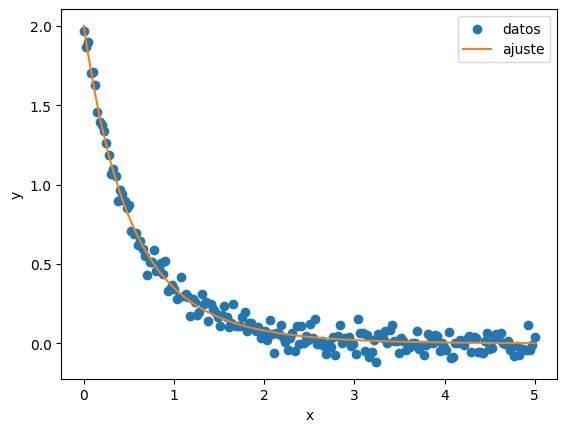

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def func(x, a1, a2):
    return np.exp(-a1 * x) + np.exp(-a2 * x)

df = pd.read_csv("datos.csv")

popt, pcov = curve_fit(func, df.x, df.y)

plt.scatter(df.x, df.y, label="datos")
plt.plot(df.x, func(df.x, *popt), c="tab:orange", label="ajuste")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()